## Section 5 - Aliasing 

In [1]:
using FFTW
using LinearAlgebra
using Plots

From the below diagram, we could find out that there only have two fourier coefficients, but theroticallly there must have four fourier coefficients.

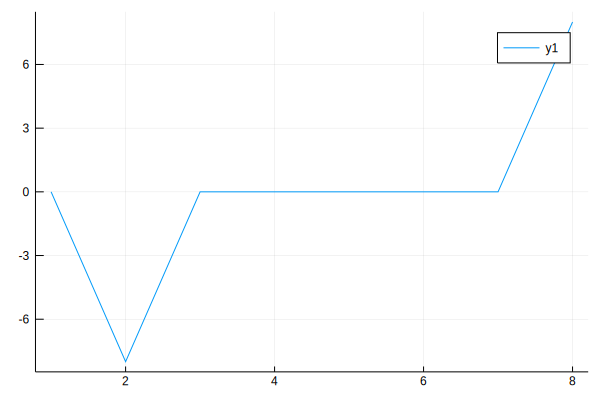

In [2]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fh=sin.(x)+sin.(9*x);
fh_hat=fft(fh);
plot(imag(fh_hat))

In the below, we set N=8, and plot both sinx and sin(9*x), we can discover that the diagram are same, so we know that the diagram of sin(9*x) has some mistake.

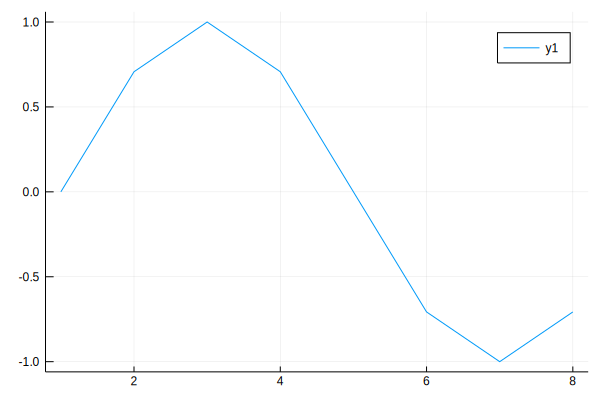

In [3]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fh=sin.(x)
plot(fh)

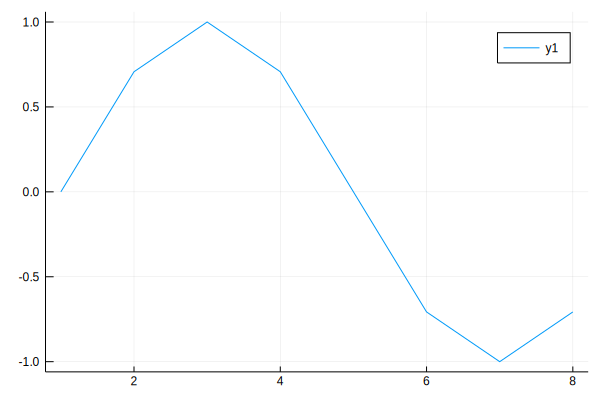

In [4]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fh=sin.(9*x)
plot(fh)

From the below, we can conclude that if we select large enough N, we can obtain the correct diagrm of sin(9*x).

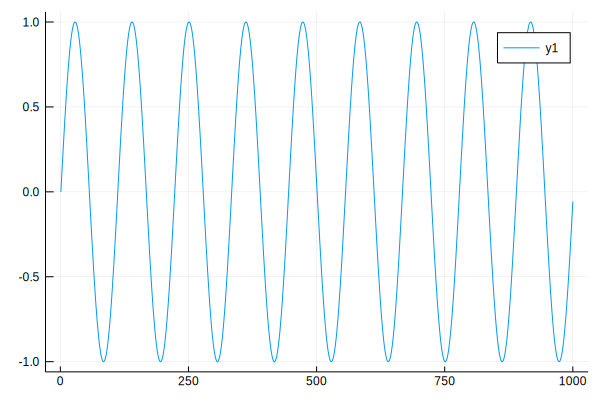

In [5]:
N=1000;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fh=sin.(9*x)
plot(fh)

So, we can also conclude that, if we choose too small "N", we cant get the correct diagram of sin(9*x).

e.g. When we choose N=8, the diagram of sinx and sin(9*x) are same.

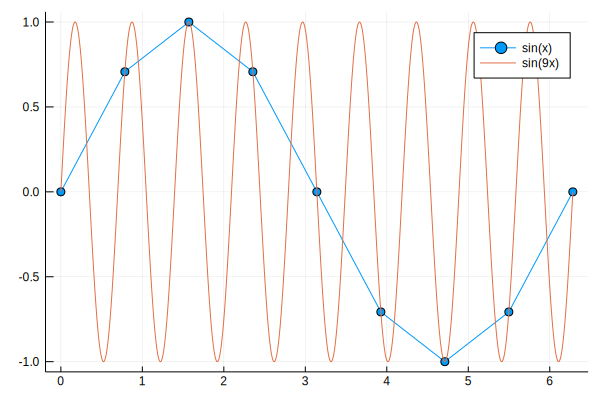

In [6]:
N=8;
x = range(0,stop=2*pi,length=N+1);
f=sin.(x);
u=plot(x,f,marker=:circle,label="sin(x)");
NN=1000;
xx = range(0,stop=2*pi,length=NN+1);
fh=sin.(9*xx);
plot!(u,xx,fh,label="sin(9x)")

### Section 5.1 - Zero-padding 
The definition of zero-padding is adding zeros to end of a time-domain signal to increase the length.

Using zero-padding has some reason:
* If there is a power-of-two number of samples(that is, if the time-domain length of waveform is power of two), this can lead to speeding up the processing time.

## Example 1
Now we want to find fourier coefficients of sin(3x)^2 through sin(3x).

According to the above example we know that, by DFT $\sin(3\theta) = \frac{1}{N}(\frac{-i3N}{2} e^{i\theta} + \frac{i3N}{2} e^{-i\theta} )$ , then we get Fourier's coefficients by discrete Fourier transform  $\hat{fs}_3 =\frac{12}{i}$, $\hat{fs}_{-3} =\frac{-12}{i}$.

And when we set the number of grids N=8, then the wave number k=-3,-2,-1,0,1,2,3,4 , so it's enough. 

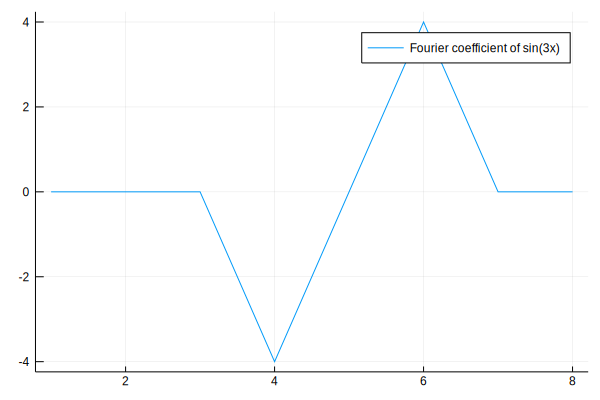

In [7]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fd=sin.(3*x);
fd_hat=fft(fd);
plot(imag(fd_hat),label="Fourier coefficient of sin(3x)")

## Example 2
In the following we try to find the coefficients of $f(x)=\sin(3x)^2$, we still set the number of grids N=8, then the wave number k=-3,-2,-1,0,1,2,3,4 , and the result is wrong so we know that it's not enough.

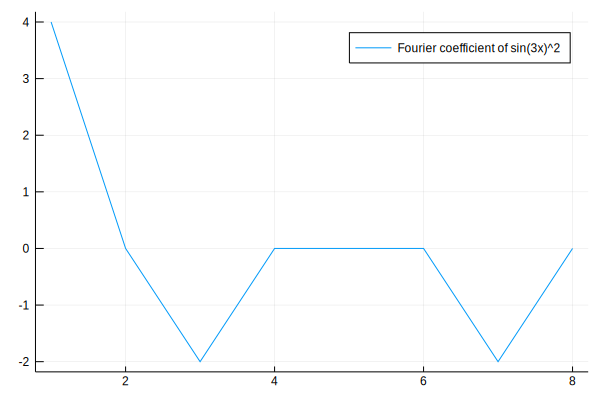

In [8]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fk=(sin.(3*x)).^2;
fk_hat=fft(fk);
plot(real(fk_hat),label="Fourier coefficient of sin(3x)^2")

We translate $f(x)=\sin(3x)^2$ into $\frac{1-\cos(6x)}{2} $, and since that $\frac{1-\cos(6x)}{2}=\frac{2-e^{6i}-e^{-6i}}{4}$ so we will find $\hat{fs}_0$, $\hat{fs}_6$ $\hat{fs}_{-6}$. 

So we should set N=16, then k=-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8. 

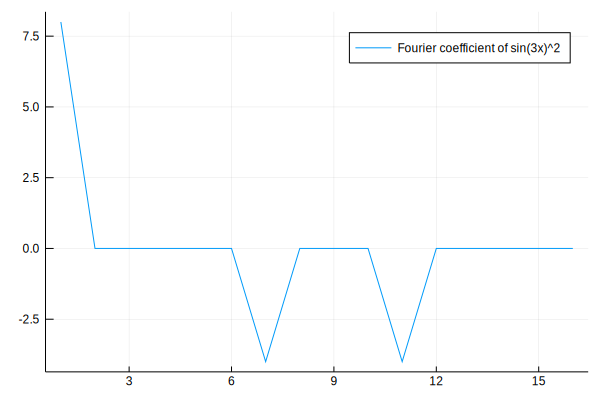

In [9]:
N=16;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fs=(sin.(3*x)).^2;
fs_hat=fft(fs);
plot(real(fs_hat),label="Fourier coefficient of sin(3x)^2")

## Conclusion
If we want to using the fourier coefficients of sin(3x) to find the fourier coefficients of sin(3x)^2, we can follow the following step:
* First we we do zero-padding, we add some fourier coefficients that equal to zero into the original fourier coefficients.
  
  e.g. According to the above examples, when it comes to sin(3x), we can find $\hat{fs}_3$  $\hat{fs}_{-3}$, so when we set N=8. But if it 
  comes to $f(x)=\sin(3x)^2$, we can find $\hat{fs}_0$ $\hat{fs}_6$ $\hat{fs}_{-6}$, we need to set N=16.
  
  So we need to add some fourier coefficients that equal to zero into the original fourier coefficients, that is $\hat{f}_0, \hat{f}_1, 
  \hat{f}_2, \hat{f}_3, \hat{f}_4, (\hat{f}_5, \hat{f}_6, \hat{f}_7, \hat{f}_8, \hat{f}_{-7}, \hat{f}_{-6}, \hat{f}_{-5}, \hat{f}_{-4}), 
  \hat{f}_{-3}, \hat{f}_{-2}, \hat{f}_{-1}$
  
  
* Before doing ifft we need to mutilpy the the coefficients after doing zero-padding by two, because the number of Fourier coefficients is     
  double.

  And also because in julia the formula of inverse discrete Fourier transform is:

  $\hat{v_k}=\frac1{N}\sum_{k={-N/2+1}}^{N/2}e^{-ik{x_j}}\hat{v_k}$, this formula is propotional to 1/N, so we need to mutilpy the the coefficients after doing zero-padding by two.

  
* Second, we do ifft.
   
   e.g. Then we transform the new fourier coefficients to sin(3x). And square the fuction.
   
   
* Third, we do fft to find the fourier coefficient of sin(3*x)^2

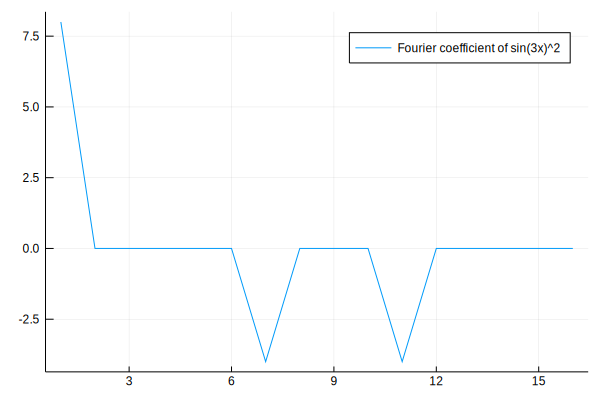

In [10]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
f = sin.(3*x);
f_hat = fft(f)

b = append!(f_hat[1:8], zeros(8)+zeros(8)*im);
c = append!(f_hat[1:5],zeros(8));
d = append!(c,f_hat[6:8]);
d=d*2

fs = ifft(d);
g = fs.^2;

g_hat = fft(g)
plot(real(g_hat),label="Fourier coefficient of sin(3x)^2")

In [11]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
f = sin.(3*x);
f_hat = fft(f)

b = append!(f_hat[1:8], zeros(8)+zeros(8)*im);
c = append!(f_hat[1:5],zeros(8));
d = append!(c,f_hat[6:8]);
d=d*2

16-element Array{Complex{Float64},1}:
 -1.7077025746869325e-15 + 0.0im                   
   8.353043791953632e-16 - 8.881784197001252e-16im 
   7.347880794884119e-16 + 1.1102230246251565e-15im
 -2.3048805381721868e-15 - 8.0im                   
   3.177278733663756e-15 + 0.0im                   
                     0.0 + 0.0im                   
                     0.0 + 0.0im                   
                     0.0 + 0.0im                   
                     0.0 + 0.0im                   
                     0.0 + 0.0im                   
                     0.0 + 0.0im                   
                     0.0 + 0.0im                   
                     0.0 + 0.0im                   
 -2.3048805381721868e-15 + 8.0im                   
   7.347880794884119e-16 - 1.1102230246251565e-15im
   8.353043791953632e-16 + 8.881784197001252e-16im 

## Truncation zero-padding (2/3-rule)
The basic idea of truncation zero-padding is set some fourier coefficients in the range to zero.

e.g. the range of K-vector:[-N/2,N/2], keep the sub-range [-K,-K] free of aliasing method, set fourier coefficients $uj^*=0$ in [-N/2,-K] and [N/2,K], K=N/3=(2/3)N/2, this is why we name it as (2/3-rule).

In [12]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
f = sin.(3*x);
f_hat = fft(f)

#c=length(f_hat[1:4])-1

8-element Array{Complex{Float64},1}:
  -8.538512873434663e-16 + 0.0im                  
   4.176521895976816e-16 - 4.440892098500626e-16im
  3.6739403974420594e-16 + 5.551115123125783e-16im
 -1.1524402690860934e-15 - 4.0im                  
   1.588639366831878e-15 + 0.0im                  
 -1.1524402690860934e-15 + 4.0im                  
  3.6739403974420594e-16 - 5.551115123125783e-16im
   4.176521895976816e-16 + 4.440892098500626e-16im

In [13]:
for i = 1:length(f_hat[1:4]);
    if abs(i) <= 2/3*(length(f_hat[1:4]));
        f_hat[i]=0;
    end
end
for j = 1:length(f_hat[1:8]);
    if abs(j) >= length(f_hat[1:4])+2/3*length(f_hat[5:8]);
        f_hat[j]=0;
    end
end
print(f_hat)

Complex{Float64}[0.0+0.0im, 0.0+0.0im, 3.67394e-16+5.55112e-16im, -1.15244e-15-4.0im, 1.58864e-15+0.0im, -1.15244e-15+4.0im, 0.0+0.0im, 0.0+0.0im]

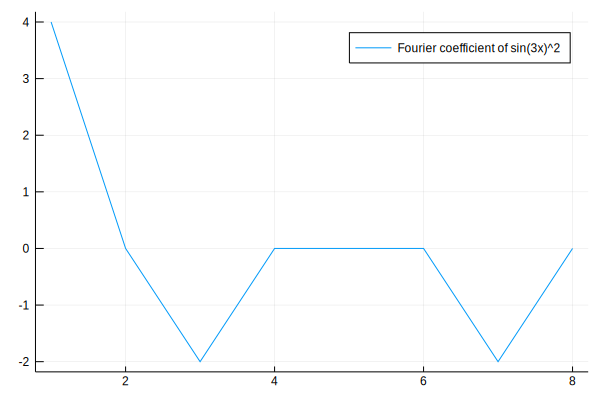

In [14]:
fc = ifft(f_hat);
l = fc.^2;
l_hat=fft(l)
plot(real(l_hat),label="Fourier coefficient of sin(3x)^2")

fft2